   ## Assignment 4

   This assignment is aimed to give you some practice using Jupyter Notebooks, R, and interpretting statistical output using real-world data. The notebook below will be used to generate the statistical output and you will also write up answers to specific questions related to the statistical output. The assignment will be guided and much of the R code will be provided for you, but specific aspects of the R code you will be asked to interact with and ultimately make a decision about appropriate values to include. The notebook should be run from the first code cell in sequential order, this means that you must run the beginning cells in order to be able to have access to the R packages needed for the assignment and that the data are read in appropriately.

   You may work in groups of up to 3 to complete the assignment. In these situations, please turn in one assignment in ICON with all group members names on the submission.

   *Assignment 4 Due*: **Sunday, December 12th, by 11:59 pm**

   ## Description of the Data

   Data on penguins will be used for this assignment. These data were collected by Dr. Kristen Gorman from real penguins in Antarctica. Citation for data: Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.

   The description of the columns of the data are shown below.

   + **species**: One of three species of penguins, Adelie, Chinstrap, or Gentoo
   + **island**: The island the penguin lives on, Torgersen, Biscoe, or Dream
   + **bill_length_mm**: The bill length, in mm, of the penguin
   + **bill_depth_mm**: The bill depth, in mm, of the penguin
   + **flipper_length_mm**: The flipper length, in mm, of the penguin
   + **body_mass_g**: The body mass, in grams, of the penguin
   + **sex**: The sex of the penguin, female or male
   + **year**: The year of data collection, 2007, 2008, or 2009.
   

   Please don't hesitate to reach out with any data questions about the structure and interpretation of the variables in the data. More information about the penguins and the measurements can be seen on this page: https://github.com/allisonhorst/palmerpenguins. The penguins and measurements are toward the bottom of this web page.

   ## Assignment Setup
   **Run this cell first upon opening the notebook everytime** This cell loads the R packages and prepares the data for you.

In [ ]:
library(tidyverse)
library(ggformula)
library(mosaic)
library(broom)

options(scipen = 999)

theme_set(theme_bw(base_size = 16))

penguins <- read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")

head(penguins)


## Question 1
Explore the bivariate relationship between the flipper length and the body mass of the penguins. That is, the research question would want to explore if the flipper length of a penguin helps to explain variation in the body mass of the penguin.
Replace "%%" with the outcome of interest and "@@" with the primary attribute to predict the outcome of interest. Finally, replace "^^" to provide descriptive axis labels for the data attributes.

In [ ]:
gf_point(%% ~ @@, data = penguins, size = 4) %>%
  gf_smooth(method = 'lm', size = 2) %>%
  gf_labs(x = "^^",
          y = "^^")


## Question 2
Using the same attributes from #1, fit a linear model to explore the relationship between the two attributes.
Replace "%%" with the outcome of interest here and "@@" with the primary attribute to predict the outcome of interest.

In [ ]:
penguin_reg <- lm(%% ~ @@, data = penguins)
coef(penguin_reg)


## Question 3
Explore the distributions of penguin bill length by the species of the penguins using violin plots.
Replace "%%" with the outcome of interest here and "@@" with the primary attribute to predict the outcome of interest. Finally, replace "^^" to provide descriptive axis labels for the data attributes.

*Note:* The 10th, 50th, and 90th percentiles are shown as vertical lines in the violin plots. 

Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”


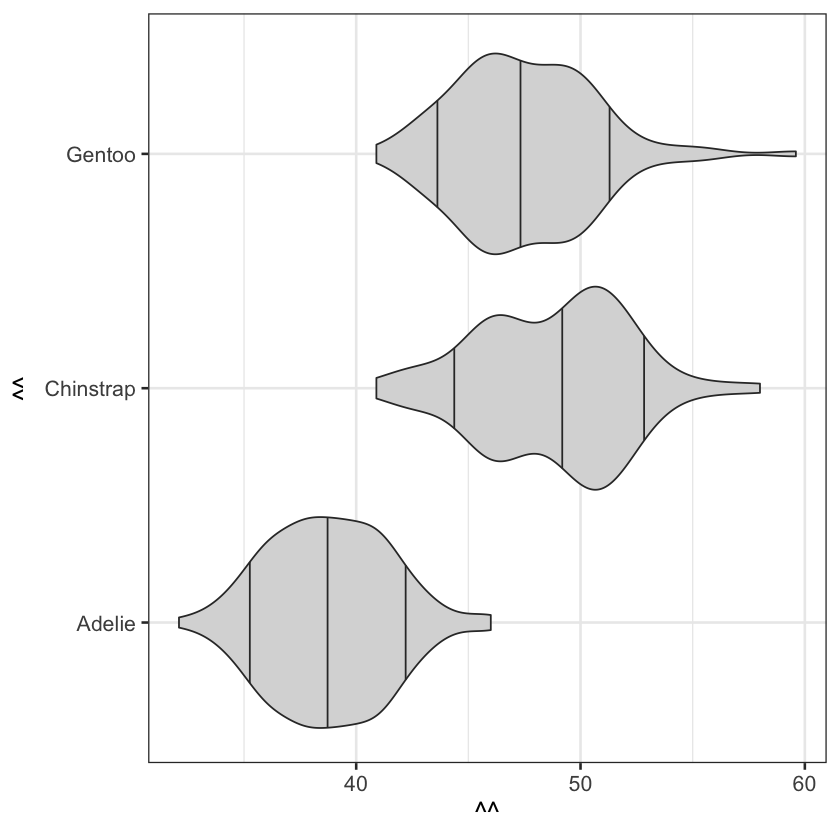

In [8]:
gf_violin(bill_length_mm ~ species, data = penguins, fill = 'gray85', draw_quantiles = c(0.1, 0.5, 0.9)) %>%
  gf_refine(coord_flip()) %>%
  gf_labs(x = "^^",
          y = "^^")


## Question 4
Using the same attributes from #3, fit a linear model to explore the relationship between the two attributes..
Replace "%%" with the outcome of interest here and "@@" with the primary attribute to predict the outcome of interest.

In [9]:
penguin_reg_island <- lm(bill_length_mm ~ species, data = penguins)
coef(penguin_reg_island)


(Intercept) speciesChinstrap    speciesGentoo 
       38.791391        10.042433         8.713487

## Question 5
The following code will perform a bootstrap for based on the attributes from question #4. The bootstrap/resampling is replicated 10,000 times.

Note, this code will take a few seconds to run. The figure is plotting as a density curve the slope estimate that was initially explored in the model from question 4 above.

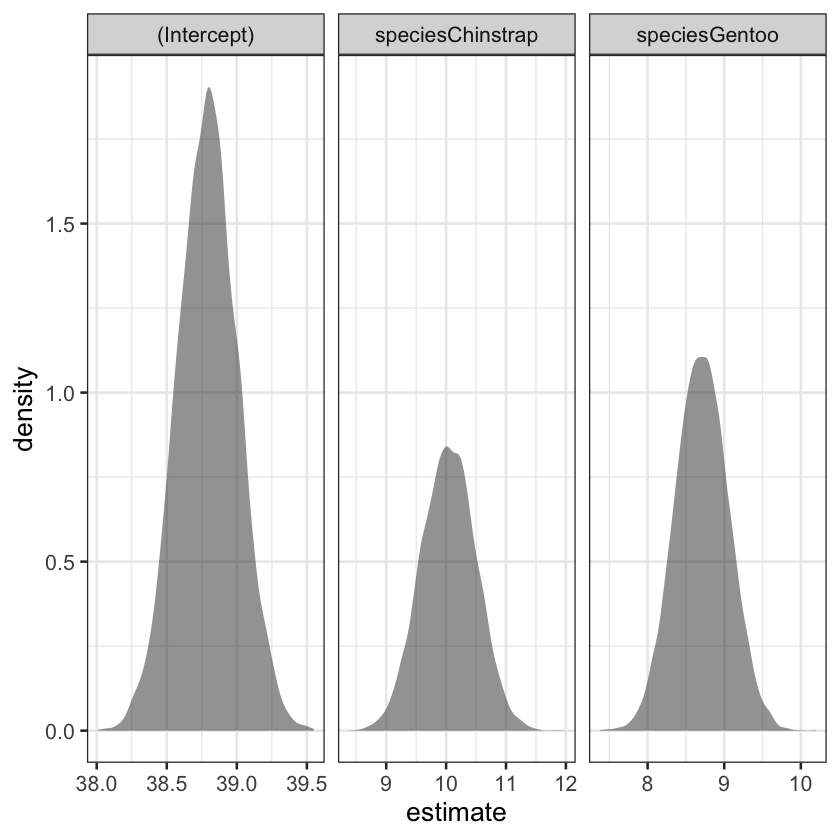

In [10]:
resample_penguin <- function(...) {
  penguin_resample <- penguins %>%
    sample_n(nrow(penguins), replace = TRUE)

 penguin_resample %>%
    lm(bill_length_mm ~ species, data = .) %>%
    tidy(.) %>%
    select(term, estimate)
}
penguin_coef <- map_dfr(1:10000, resample_penguin)

 penguin_coef %>%
    gf_density(~ estimate) %>%
    gf_facet_wrap(~ term, scale = 'free_x')
